<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Александр! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

# Рекомендация тарифов

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

**Цель исследования**
  
Создать систему рекомендаций тарифов на основе данных о использовании мобильной сети и мобильного трафика пользователями

**Ход исследования**

 - Сформируем обучающую, валидационную и тестовую выборки
 - Изучим точность нескольких моделей: `дерева решений`, `случайного леса` и `логистической регрессии`
 - Проверим наиболее точную модель на тестовой выборке
 - проверим наиболее точную модель в тесте на адекватность

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Вступление в работу очень важно, так человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела.





</div>

## Откройте и изучите файл

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 


<div class="alert alert-warning">

Совет:     
    
    


- кстати есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html), в будущем пригодится )  


In [72]:
try:
    df = pd.read_csv('users_behavior.csv')
except:
    df = pd.read_csv('/datasets/users_behavior.csv')

df.info()
display(df.head())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Посмотрим как распределены целевые признаки

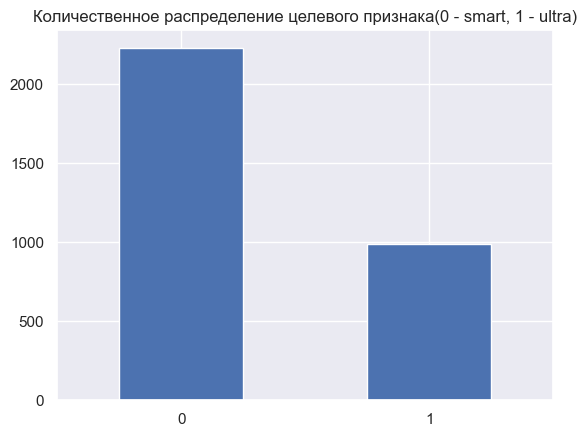

smart: 69.35%
ultra: 30.65%


In [49]:
df['is_ultra'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Количественное распределение целевого признака(0 - smart, 1 - ultra)')
plt.show()
print('smart:', '{:.2%}'.format(len(df[df['is_ultra'] == 0]) / df.shape[0]))
print('ultra:', '{:.2%}'.format(len(df[df['is_ultra'] == 1]) / df.shape[0]))

Посмотрим на корреляцию признаков

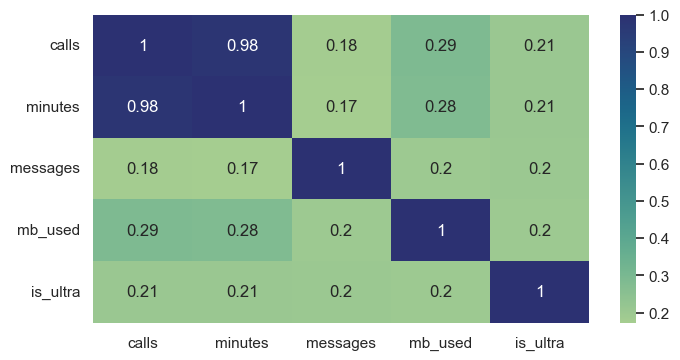

In [61]:

plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True, cmap='crest')
plt.show()

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:
    
Мне пришлось подправить твой код чтобы запустилось. Для некоторых особо строгих ревьюеров это основание завернуть работу без проверки, так что будь внимательней в следующий раз )
    
Совет - используй конструкцию try except:    
  
    try:

        df = pd.read_csv('C:/your_project/users_behavior.csv')
    except:

        df = pd.read_csv('/datasets/users_behavior.csv')
   
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 Данные изучены.



<div class="alert alert-warning">



Совет: 




- Можно еще отдельно проверить датасет на сбалансированность классов в таргете. Это помогло бы решить бонусное задание сразу (Только не надо балансировать данные, это тема следующего проекта).




- Можно посмотреть корреляцию признаков. Знаешь что такое мультиколлинеарность, какие два типа проблем возникает, для каких моделей и какие варианты решения?




</div>


## Разбейте данные на выборки

Разобьем данные на три части - для обучения, валидации и теста в соотношении 60%:20%:20%

In [ ]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.4, random_state=123)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.5, random_state=321)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Все правильно!



<div class="alert alert-warning">



Совет: 


- Обрати внимание на аргумент stratify, он позволит сохранить изначальное распределение таргетов во всех новых датасетах.  Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым. [Почитать](https://pythonru.com/baza-znanij/sklearn-train-test-split) можно тут


- После разбиения лучше перестраховаться и использовать .shape, для контроля за корректностью разбиения





## Исследуйте модели

### Дерево решений

Первая модель для исследования - дерево решений. Попробуем глубину дерева от 1 до 20 и выберем самую удачную

In [ ]:
def decision_tree(return_model=False):
    accuracy_train = []
    accuracy_valid = []
    best_accuracy = 0
    best_depth = 0

    for depth in range(1, 20):
        model = DecisionTreeClassifier(max_depth=depth, random_state=123)
        model.fit(features_train, target_train)

        answers_train = model.predict(features_train)
        answers_valid = model.predict(features_valid)

        accuracy_train.append(accuracy_score(target_train, answers_train))
        accuracy_valid.append(accuracy_score(target_valid, answers_valid))

        if accuracy_valid[depth - 1] > best_accuracy:
            best_accuracy = accuracy_valid[depth - 1]
            best_depth = depth
            best_model = model

    sns.set()
    xaxis = range(1, len(accuracy_train)+1)
    sns.lineplot(x=xaxis, y=accuracy_train, label='train')
    sns.lineplot(x=xaxis, y=accuracy_valid, label='valid')
    plt.xlabel('Глубина дерева')
    plt.ylabel('Точность')
    plt.show()
    print('Оптимальная глубина:', best_depth)
    print('Лучшая точность:', best_accuracy)

decision_tree()

Видно, что модель начинает переобучаться, если задать слишком высокий гиперпараметр глубины

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:
 
Работа выполнена в соответствии с критериями: 



 - модель обучена на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле


Отличный график, и верный вывод



<div class="alert alert-warning">


Совет: 


- tree_plot можно построить, с max_depth равной 3 или 4 (глубже уже будет громоздко) - глянуть как DT сплиты делает, будет понимание как модель принимает решения: какие признаки  использует, на каких значениях делает разбиение вправо - влево 




</div>



### Лес деревьев

Следующая модель - лес деревьев. Его обучение и перебор количества деревьев займет больше времени, но и точность ожидается выше

In [ ]:
def random_forest():
    accuracy_train = []
    accuracy_valid = []
    best_accuracy = 0
    best_est = 0

    for est in range(1, 100):
        model = RandomForestClassifier(n_estimators=est, random_state=123)
        model.fit(features_train, target_train)

        answers_train = model.predict(features_train)
        answers_valid = model.predict(features_valid)

        accuracy_train.append(accuracy_score(target_train, answers_train))
        accuracy_valid.append(accuracy_score(target_valid, answers_valid))

        if accuracy_valid[est - 1] > best_accuracy:
            best_accuracy = accuracy_valid[est - 1]
            best_est = est

    sns.set()
    xaxis = range(1, len(accuracy_train)+1)
    sns.lineplot(x=xaxis, y=accuracy_train, label='train')
    sns.lineplot(x=xaxis, y=accuracy_valid, label='valid')
    plt.xlabel('Количество деревьев')
    plt.ylabel('Точность')
    plt.show()
    print('Оптимальное количество деревьев:', best_est)
    print('Лучшая точность:', best_accuracy)

random_forest()

Узнали, что нет смысла "растить" больше 39 деревьев в одном лесу

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



- Александр, можно было сделать похитрее, RF одна из лучших моделей в классическом machine-learning, поэтому можно было добавить перебор 2 гиперпараметров в двойном цикле, в результата метрика качества вырастет. 
 


- Когда что то долго крутиться, можно использовать  %%time - ставишь на самый вверх ячейки с кодом, время выполнения которого хочешь замерить, может не знаешь.  Быстрее не станет, но все будут видеть стоит ли ждать не отходя от ПК или можно сходить чаек поставить )) 
    
    Или tqdm, это ещё лучше, потому что он показывает интерактивно, на каком этапе расчетов мы находимся

    
    from tqdm import tqdm


    for n_estimators in tqdm(range(3,58)):

        ..........



(дальше мы будем уходить от неэффективных в питоне циклов к apply.  Там тоже есть аналог прогресс-баров:  .progress_apply)
    
И будет красиво )   
 



- Видишь разницу, и можешь объяснить разницу между поведением метрики на валидации у дерева решений и случайного леса 


### Логистическая регрессия

Модель - логистическая регрессия. У нее попробуем поменять гиперпараметр итераций обучения от 100 до 1000 с шагом в 100

In [ ]:
def logistic_regression():
    accuracy_train = []
    accuracy_valid = []
    best_accuracy = 0
    best_iter = 0

    for iterations in range(100, 1001, 100):
        model = LogisticRegression(max_iter=iterations, random_state=123)
        model.fit(features_train, target_train)

        answers_train = model.predict(features_train)
        answers_valid = model.predict(features_valid)

        accuracy_train.append(accuracy_score(target_train, answers_train))
        accuracy_valid.append(accuracy_score(target_valid, answers_valid))

        if accuracy_valid[iterations//100 - 1] > best_accuracy:
            best_accuracy = accuracy_valid[iterations//100 - 1]
            best_iter = iterations

    sns.set()
    xaxis = range(100, len(accuracy_train)*100+1, 100)
    sns.lineplot(x=xaxis, y=accuracy_train, label='train')
    sns.lineplot(x=xaxis, y=accuracy_valid, label='valid')
    plt.xlabel('Количество итераций обучения')
    plt.ylabel('Точность')
    plt.show()
    print('Оптимальное количество итераций обучения:', best_iter)
    print('Лучшая точность:', best_accuracy)

logistic_regression()

Гиперпараметр никак не повлиял на точность обученной модели

### Итог
---
По итогам, наиболее точной в предсказаниях оказалась модель случайного леса. Ее мы дальше и проверим на тестовой выборке, а также на адекватность


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Все верно, RF лучший. 


<div class="alert alert-warning">


Совет: 

Если есть желание можешь ответить на вопросики ))    



- Как назвать ситуацию, когда на валидации при увеличении глубины дерева (модель DT), метрика качества стала снижаться? Как по твоему в это же время вела себя эта же метрика на train?


- Насколько знаю вы еще под капот моделям не заглядывали, но может знаешь почему обычно RF показывает более высокие результаты из выбранных?


- Мы решаем задачу классификации (а еще есть задача регрессии), а в названии модели с помощью которой мы решаем задачу "классификации" (Логистическая регрессия) есть слово "регрессия".  Нет ли тут парадокса? )
    

- Почему логистическая регрессия показывать на много более худшие результаты?  


</div>





## Проверьте модель на тестовой выборке

In [ ]:
best_model = RandomForestClassifier(n_estimators=39, random_state=123)
best_model.fit(features_train, target_train)
answers_test = best_model.predict(features_test)
print('Точность на тестовой выборке', accuracy_score(target_test, answers_test))

Точность оказалась на уровне валидирующей выборки, что ожидаемо


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


- Все верно, логика моделирования не нарушена, тут тестируем только лучшую модель (или парочку, если метрики были близки) отобранную на валидации. 

- Если студент получил на тесте accuraсy  выше 0,78, это считается отличным результатом. Ты подбираешь лучшую комбинацию не по одному гиперпараметру и вот он результат!



<div class="alert alert-warning">

Вопросики и совет:




- Как попробовать улучшить результат, не мучаясь с кодом?! Смотри - мы сформировали train выборку на которой обучаем модель, а валидационную используем для поиска лучших значений гиперпараметров. Оке, нашли их. Так почему бы теперь модель с выбранными гиперпараметрами не обучить на тренировочной + валидационной выборке (только не нужно делать новые сплиты, используй pd.concat(), к примеру)?! Чем больше данных, тем лучше модель может обучиться. И эту дообученную модель проверим на тесте. Гаранитий что станет лучше нет, но ML это постоянные эксперименты.  
    
    
- А можешь предложить как нам использовать полученный результат в бизнесе? Как нам на этих прогнозах сделать деньги? 




- Александр, в качестве бонуса можешь вывести еще несколько метрик своей модели - precision, recall, F1 и confussion matrix) Все есть в sklearn)




## (бонус) Проверьте модели на адекватность

In [ ]:
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(features_train, target_train)
dummyclassifier_answers = dummy_classifier.predict(features_test)
print('Точность случайной модели', accuracy_score(target_test, dummyclassifier_answers))

Точность модели, которая всегда будет отвечать 0 или 1(тот ответ, которого в обучающей выборке большинство) составляет 0.69, а у нашей 0.81. Это значит, наша модель пусть немного, но все же умнее случайной

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Все верно. 

👍 что используешь специальную обертку для проверки на адекватность

</div>

## Итог

При создании системы рекомендаций протестировали три типа модели:
- Дерево решений
- Случайный лес
- Логистическая регрессия

Самой точной оказалась `модель Случайного леса` - с точностью 0.81, которая также усппешно прошла проверку на адекватность.

При изменении случайного распределения и обучения(random_state) могут незначительно меняться оптимальные гиперпараметры для моделей, а также точность. Но модель случайного леса всегда остается самой точной и проходит тест на адекватность


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>




Александр, у тебя старательно выполненная работа, все четко, осмысленно. Выводы присутствуют
    
    


Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить): 




- обрати внимание на проверку сбалансированность классов в таргете в разделе EDA
- использовать stratify
- добавить график метрики    
- как можно улучшить результаты 



    
Обязательное к исправлению:



    
    
    
- ошибка неисполнения кода




    
    
Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 





</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
